# NGC 3201 Analysis - optical data

In [1]:
import matplotlib.pyplot as mp
import read_dao
import sys
import coordinates
import numpy as np
from matplotlib.ticker import ScalarFormatter
from astropy.wcs import WCS
from astropy.io import fits
import optical
import lightcurves
%matplotlib inline 

In [2]:
target = 'NGC3201'
folder = '/Volumes/Annie/CRRP/'+target+'/'
optical_dir = '/Volumes/Annie/CRRP/OpticalCatalogs/'
cluster_ra = '10:17:36.82'
cluster_dec = '-46:24:44.9'

# Variable stars

In [ ]:
# Find all stars identified as possible variables in optical catalog and list them in PeterIDs.txt

center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
optical.find_variables_fnl(optical_dir, target, center_ra, center_dec, data_dir=folder)

# Period Search

### Read in variables from Clement catalog

In [3]:
dtype1 = np.dtype([('id', 'S10'), ('period', float)])
data = np.loadtxt(folder+target+'-clement.txt', dtype=dtype1, usecols=(0,3))

datasets, colors = optical.compile_datasets(folder, old=0, returnColors=True)



Datasets:

  1      Y0701  28843 2007-01-13 2007-01-23 k
  2      Y0704  24957 2007-03-31 2007-04-11 r
  3     lcogt2  19917 2013-03-14 2013-03-23 b
  4       lee4  12538 2012-02-18 2012-02-23 g
  5      B1201   6906 2012-01-06 2012-01-11 m
  6     zingle   4198 1996-04-16 1996-04-19 c
  7      wfi13   3062 2003-06-04 2003-06-06 xkcd:brown
  8      Y0706   2848 2007-06-05 2007-06-09 xkcd:coral
  9     lcogt3   2770 2014-03-02 2014-03-02 xkcd:purple
 10     ct1204   2253 2012-04-24 2012-04-24 xkcd:maroon
 11       wfi6   2121 2002-02-20 2002-02-20 xkcd:olive
 12      west1   2070 2005-02-11 2005-02-11 xkcd:tan
 13      bond6   1731 1998-04-17 1998-04-22 xkcd:grey
 14      wfi22   1607 2000-02-27 2000-02-27 xkcd:teal
 15      wfi11   1548 1999-12-05 1999-12-05 xkcd:tomato
 16      wfi41   1427 2012-02-24 2012-02-27 xkcd:orchid
 17   efosc08a   1304 2008-04-19 2008-04-19 xkcd:goldenrod
 18      west2    922 2005-05-05 2005-05-05 xkcd:orange
 19 efosc1101b    845 2011-01-21 2011-01-21 xk

In [4]:
# Find periods for all stars in clement catalog

print '\n\nStar  Period_old  Period_new'

for ind, lcv in enumerate(data['id']):

# Open file to save periods
    if ind == 0:
        f_handle = open(folder+'periods.txt', 'w')
    else:
        f_handle = open(folder+'periods.txt', 'a')

    lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'
    clement_period = data['period'][data['id'] == lcv]
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file)
        new_guess, guess_snr = lightcurves.period_search_LS(V, lcv, plot_save=1, data_dir=folder)
        period_diff = np.abs(new_guess - clement_period)
        if period_diff < 0.01 and np.isnan(clement_period) == 0:
            new_period = lightcurves.period_search(V, new_guess, second_band=B, search_window=0.00005)
            lightcurves.plot_phased_optical_lcv(U, B, V, R, I, new_period, lcv, datasets, plot_save=1,data_dir=folder, colors=colors)

        else:
            new_period = lightcurves.period_search(V, new_guess, second_band=B, search_window=0.00005)
            second_period = lightcurves.period_search(V, clement_period, second_band=B, search_window=0.0001) 
            lightcurves.plot_phased_optical_lcv(U, B, V, R, I, new_period, lcv, datasets, plot_save=1,data_dir=folder, colors=colors)
            lightcurves.plot_phased_optical_lcv(U, B, V, R, I, second_period, lcv+'c', datasets, plot_save=1,data_dir=folder, colors=colors)

        print '%10s %0.4f %0.8f %0.2f' % (lcv, clement_period, new_period, guess_snr)
        f_handle.write('%10s %0.4f %0.8f\n' % (lcv, clement_period, new_period))

    except IOError:
        new_period = np.nan
        print '%10s %0.4f %0.8f %7s' % (lcv, clement_period, new_period, 'No data')
        f_handle.write('%10s %0.4f %0.8f %10s\n' % (lcv, clement_period, new_period, '# no data'))        

    except:
        new_period = np.nan
        print '%10s %0.4f %0.8f' % (lcv, clement_period, new_period)
        f_handle.write('%10s %0.4f %0.8f\n' % (lcv, clement_period, new_period))

    # Close the periods file
    f_handle.close()



Star  Period_old  Period_new
        V1 0.6048 0.60488190 21.48
        V2 0.5326 0.53267700 17.73
        V3 0.5994 0.59941880 23.38
        V4 0.6300 0.63001400 18.27
        V5 0.5013 0.50153980 18.31
        V6 0.5253 0.52561830 20.28
        V7 0.6303 0.63032740 29.99
        V8 0.6286 0.62864050 26.97
        V9 0.5254 0.52669150 16.87
       V10 0.5352 0.53516420 17.47
       V11 0.2991 0.29904815 23.29
       V12 0.4974 0.49554840 25.14
       V13 0.5748 0.57520820 16.26
       V14 0.5089 0.34021184 18.23
       V15 0.5347 0.53466330 17.27
       V16 0.2634 0.26344042 30.53
       V17 0.5658 0.56559370 16.01
       V18 0.5404 0.53885920 20.89
       V19 0.5250 0.52503060 19.01
       V20 0.5291 0.52910050 18.70
       V21 0.5668 0.56662920 17.79
       V22 0.6058 0.60598600 15.81
       V23 0.5868 0.58677760 22.37
       V24 0.5890 0.58894920 18.22
       V25 0.5147 0.51480040 17.20
       V26 0.5690 0.56896060 23.39
       V27 0.4843 0.48430650 16.62
       V28 0.5795 0.5786

/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


       V55 0.6070 0.61108650 3.53
       V56 0.5903 0.59033780 24.78
       V57 0.5934 0.59343720 17.84
       V58 0.6220 0.62204080 18.13
       V59 0.5177 0.51770930 14.81
       V60 0.5036 nan No data
       V61 0.5400 nan No data
       V62 0.5698 nan No data
       V63 0.5681 nan No data
       V64 0.5224 nan No data
       V66 0.2840 0.66703880 21.51
       V67 0.3279 0.33226960 26.72
       V69 0.5123 nan No data
       V71 0.6012 0.60118970 24.39
       V72 0.3600 nan No data
       V73 0.5195 0.51995660 11.71
       V76 0.5267 0.52559780 18.70
       V77 0.5674 0.56764120 22.70
       V78 0.5139 0.51389400 24.81
       V80 0.5887 0.58998310 21.88
       V81 0.5198 0.51975730 18.42
       V83 0.5452 0.54520460 18.95
       V84 0.5137 nan No data
       V87 0.6039 nan No data
       V88 0.5700 nan No data


/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/peakutils/peak.py:37: RuntimeWarning: invalid value encountered in double_scalars
  thres = thres * (np.max(y) - np.min(y)) + np.min(y)
lightcurves.py:782: RuntimeWarning: divide by zero encountered in divide
  ax1.plot(1/alias_freq, alias_power, 'kx')
lightcurves.py:790: RuntimeWarning: invalid value encountered in double_scalars
  snr_best = power[np.argmax(power)]/median_power
lightcurves.py:718: RuntimeWarning: invalid value encountered in log10
  order = np.ceil(np.abs(np.log10(max_precision)))


       V89 0.3690 nan
       V90 0.6064 0.60610170 19.89
       V91 0.3450 nan No data
       V92 0.5395 0.53958350 17.53
       V93 0.4800 nan No data
       V96 0.5900 nan No data
       V98 0.3363 0.33564583 36.76
      V100 0.5485 0.54892210 19.37


V47 0.5212


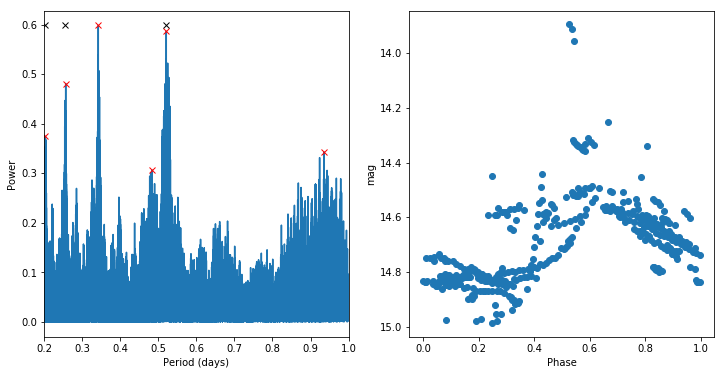

(0.34214960682940204, 18.217733418680545)


In [13]:
### For single star
ind=45
print data['id'][ind], data['period'][ind]
lcv = data['id'][ind]
initial_period = data['period'][ind]
lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'

U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, 0.52039385, lcv, datasets, error_threshold=0.05, colors=colors)#, plot_save=1,data_dir=folder)

# broad Lomb Scargle
new_guess = lightcurves.period_search_LS(V, lcv)
print new_guess

Star  Period  Period_new
V76 0.5267 0.525433242376


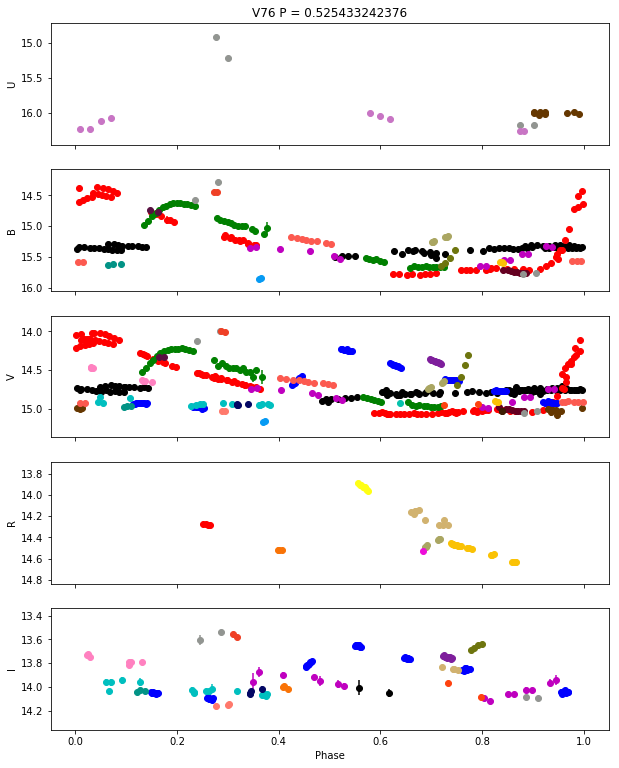

In [19]:
period = lightcurves.period_search(B, new_guess, lcv, second_band=I, search_window=0.0005)
print 'Star  Period  Period_new'
print lcv, initial_period, period
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, lcv, datasets, error_threshold=0.1, colors=colors)


In [15]:
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, lcv, datasets, plot_save=1,data_dir=folder, colors=colors)




# Search for other variable candidates

In [14]:
center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
catalog_data, dist = optical.read_fnl_w_radial_dist(optical_dir, target, center_ra, center_dec)

#dtype1 = np.dtype([('id', 'S8'), ('period', float), ('var_type', 'S5')])
dtype1 = np.dtype([('id', 'S8'), ('ra', 'S13'), ('dec', 'S13')])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,9,10))

Reading optical catalog for NGC3201...
Finished reading optical catalog.


Datasets:

     Y0701  95202 2007-01-13 2007-01-23 k
    lcogt2  69985 2013-03-14 2013-03-23 r
     Y0704  24334 2007-03-31 2007-04-13 b
    zingle  15701 1996-04-16 1996-04-19 g
      lee4  11616 2012-02-18 2012-02-23 m
     west1  11444 2005-02-11 2005-02-13 c
     wfi13  10623 2003-06-04 2003-06-06 xkcd:brown
    lcogt3   9918 2014-03-02 2014-03-02 xkcd:coral
    ct1204   8009 2012-04-24 2012-04-24 xkcd:purple
  efosc08a   7693 2008-04-19 2008-04-19 xkcd:maroon
     bond6   7436 1998-04-17 1998-04-22 xkcd:olive
      wfi6   6815 2002-02-20 2002-02-20 xkcd:tan
     B1201   6727 2012-01-06 2012-01-11 xkcd:grey
     wfi22   5403 2000-02-27 2000-02-27 xkcd:teal
efosc1101b   5379 2011-01-21 2011-01-21 xkcd:tomato
      lee2   5052 2011-05-30 2011-06-03 xkcd:orchid
     wfi41   4855 2012-02-24 2012-02-27 xkcd:goldenrod
     wfi11   4648 1999-12-05 1999-12-05 xkcd:orange
     west2   4238 2005-05-05 2005-05-05 xkcd:

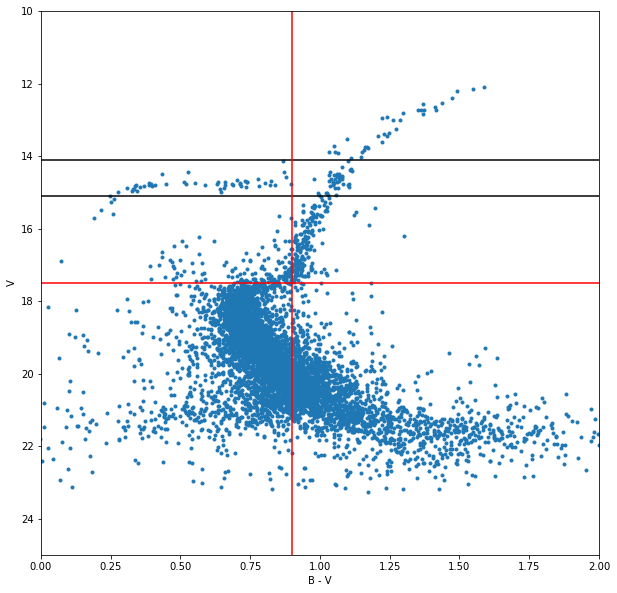

In [18]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')
# Define HB
HB_lower = 15.1
HB_upper = 14.1
mp.axhline(HB_lower, color='k')
mp.axhline(HB_upper, color='k')
#Define GB
GB_red = 0.9
GB_lower = 17.5
mp.axvline(GB_red, color='r')
mp.axhline(GB_lower, color='r')

88 candidate RRL stars.
123 candidate variables on GB.
386 other candidate variables.


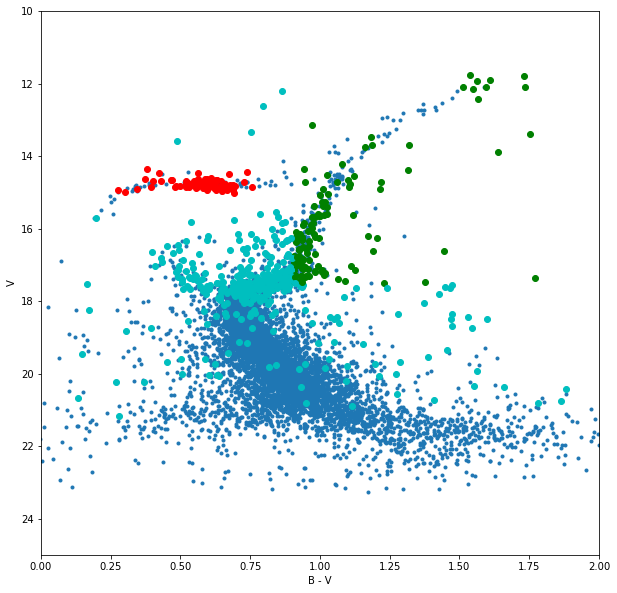

In [19]:
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')

type_var = np.zeros(len(data['id']), dtype='S4')
for ind, lcv in enumerate(data['id']):
    
    lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
    except:
        type_var[ind] ='ND'
        continue

    color_var = np.nanmean(B[0]) - np.nanmean(V[0])
    mag_var = np.nanmean(V[0])

    
    if (mag_var <= HB_lower and mag_var >= HB_upper and color_var <= GB_red):
        type_var[ind] = 'RRL'
        mp.plot(color_var, mag_var, 'ro')
    elif (mag_var <= GB_lower and color_var >= GB_red):
        type_var[ind] = 'GB'
        mp.plot(color_var, mag_var, 'go')
    else:
        type_var[ind] = 'OTH'
        mp.plot(color_var, mag_var, 'co')

RRL_candidates = data['id'][type_var == 'RRL']
print str(len(RRL_candidates))+' candidate RRL stars.'
GB_variables = data['id'][type_var == 'GB']
print str(len(GB_variables))+' candidate variables on GB.'
other_variables = data['id'][type_var == 'OTH']
print str(len(other_variables))+' other candidate variables.'

In [ ]:
for ind, star in enumerate(other_variables):
    print ind, star, data['ra'][data['id'] == star], data['dec'][data['id'] == star]

In [ ]:
ind = 24
lcv_name = other_variables[ind]
#lcv_name = RRL_candidates[ind]
#lcv_name = 'V60'
lcv_file = folder+'lcvs/optical/'+target+lcv_name+'.lcv'
U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
#print lcv_name, data['var_type'][ind], data['period'][ind]
#cc_period = data['period'][ind]
print lcv_name

In [ ]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')


color_var = np.mean(B[0]) - np.mean(V[0])
mag_var = np.mean(V[0])
mp.plot(color_var, mag_var, 'ro')
mp.show()

# remove data with large error bars
error_threshold = 0.1
V[0][V[1] > error_threshold] = np.nan
V[1][V[1] > error_threshold] = np.nan

lightcurves.plot_raw_optical_lcv(V)

# Find best dataset to use
sources_prefix = np.zeros(len(V[3]), dtype='S30')
for ind, string in enumerate(V[3]):
    sources_prefix[ind] = string.split(':')[0]
sources, counts = np.unique(sources_prefix, return_counts=True)
best_source = sources[counts == np.max(counts)]

num_obs_in_run = len(V[0][sources_prefix == best_source])
longest_dataset = np.zeros((4, num_obs_in_run), dtype=object)
longest_dataset[0][:] = V[0][sources_prefix == best_source]
longest_dataset[1][:] = V[1][sources_prefix == best_source]
longest_dataset[2][:] = V[2][sources_prefix == best_source]
longest_dataset[3][:] = V[3][sources_prefix == best_source]

lightcurves.plot_raw_optical_lcv(longest_dataset)


# find night with the most data

obs_times = np.array(longest_dataset[2], dtype=float)
nights = np.round(obs_times, 0)
uniq_nights, counts = np.unique(nights, return_counts=True)
order = np.argsort(counts)
best_nights = uniq_nights[order]
best_night = uniq_nights[counts == np.max(counts)][0]
num_obs_in_night = len(V[2][nights == best_night])

longest_night = np.zeros((4, num_obs_in_night), dtype=object)
longest_night[0][:] = longest_dataset[0][nights == best_night]
longest_night[1][:] = longest_dataset[1][nights == best_night]
longest_night[2][:] = longest_dataset[2][nights == best_night]
longest_night[3][:] = longest_dataset[3][nights == best_night]


lightcurves.plot_raw_optical_lcv(longest_night)

In [ ]:
candidate_periods = variables.candidate_variables(V, lcv_name, min_period=0.1, max_period=0.9, grid_num=1000)



In [ ]:
for period in candidate_periods:
    if period == 0:
        continue
    lightcurves.plot_phased_optical_one_band(V, period, lcv_name, datasets)